In [1]:
# Simulación de un sistema de Segmentación y procesamiento de material Plastico
# Desarrollado por Héctor F. Rivera Santiago
# Copyright (c) 2024

%pip install matplotlib pandas numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración inicial
conveyor_speed = 300  # pulgadas/seg
camera_to_sensor_distance = 12  # pulgadas
sensor_to_valve_1_distance = 21  # pulgadas
sensor_to_valve_2_distance = 27  # pulgadas
object_spacing = 20  # cm
object_weight = 0.05  # kg
initial_material = 1000  # kg/h
residue_percentages = {"machine_1": 10, "machine_2": 5, "machine_3": 2}
cycles = 3  # Número de ciclos en el sistema

# Funciones de cálculo
def calculate_delay(distance, speed):
    return round(distance / speed, 2)

def calculate_flow(conveyor_speed, object_spacing, object_weight):
    objects_per_second = conveyor_speed * 2.54 / object_spacing
    objects_per_hour = objects_per_second * 3600
    return round(objects_per_hour * object_weight, 2)

def calculate_processed_material(initial_material, residue_percentage, cycles):
    material = initial_material
    for _ in range(cycles):
        material -= material * (residue_percentage / 100)
    return round(material, 2)

# Cálculo de delays
delays = {
    "camera_to_sensor": calculate_delay(camera_to_sensor_distance, conveyor_speed),
    "sensor_to_valve_1": calculate_delay(sensor_to_valve_1_distance, conveyor_speed),
    "sensor_to_valve_2": calculate_delay(sensor_to_valve_2_distance, conveyor_speed),
}

# Flujo inicial
flow = calculate_flow(conveyor_speed * 2.54, object_spacing, object_weight)

# Material procesado
outputs = {
    "machine_1": calculate_processed_material(initial_material, residue_percentages["machine_1"], 1),
    "machine_2": calculate_processed_material(
        initial_material * (1 - residue_percentages["machine_1"] / 100),
        residue_percentages["machine_2"], 1
    ),
    "machine_3": calculate_processed_material(
        initial_material * (1 - residue_percentages["machine_1"] / 100) * (1 - residue_percentages["machine_2"] / 100),
        residue_percentages["machine_3"], 1
    ),
}


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Simulación del Proceso

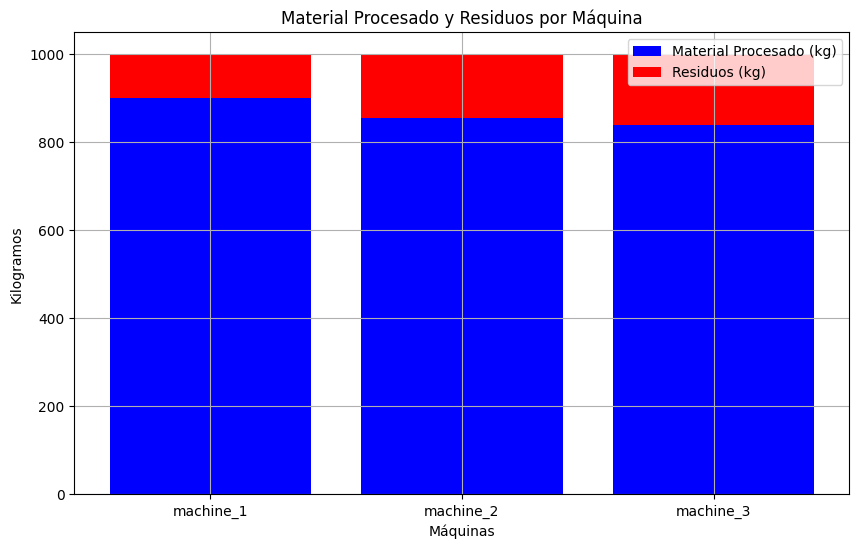

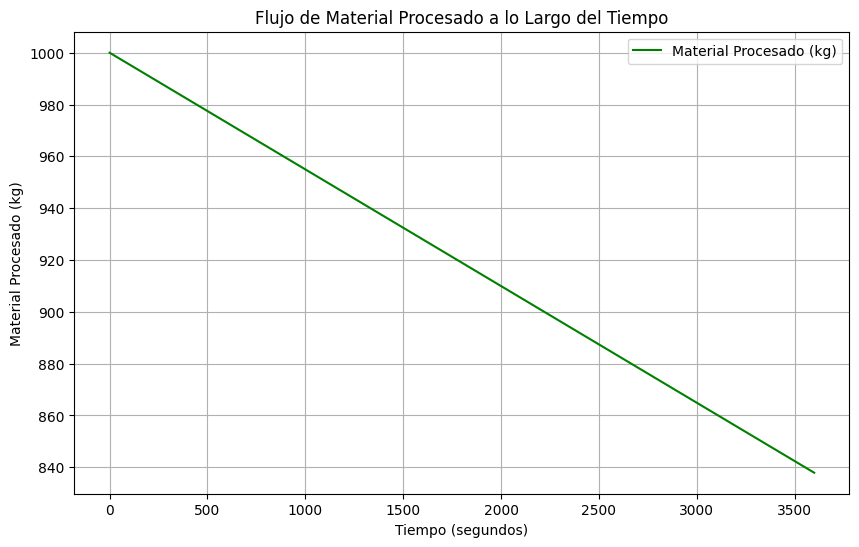

In [2]:
# Visualización de residuos y procesados
machines = list(outputs.keys())
processed_material = list(outputs.values())
residues = [initial_material - output for output in processed_material]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(machines, processed_material, color="blue", label="Material Procesado (kg)")
plt.bar(machines, residues, bottom=processed_material, color="red", label="Residuos (kg)")
plt.title("Material Procesado y Residuos por Máquina")
plt.xlabel("Máquinas")
plt.ylabel("Kilogramos")
plt.legend()
plt.grid()
plt.show()

# Gráfica de flujo acumulativo
time_steps = np.linspace(0, 3600, 100)  # Simulación de 1 hora
material_flow = [initial_material - (step / 3600) * (initial_material - outputs["machine_3"]) for step in time_steps]

plt.figure(figsize=(10, 6))
plt.plot(time_steps, material_flow, label="Material Procesado (kg)", color="green")
plt.title("Flujo de Material Procesado a lo Largo del Tiempo")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Material Procesado (kg)")
plt.legend()
plt.grid()
plt.show()
